In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the data as a dataframe

df = pd.read_excel(r'CommerceLabor.xlsx', sheet_name='Department of Labor')

df1 = pd.read_excel(r'CommerceLabor.xlsx', sheet_name='Department of Commerce')

In [3]:
df.head()

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT
0,114016000000,DL,4.0,3.0,5.0,5.0,4.0,4.0,5.0,4,...,B,B,B,B,B,B,A,B,A,1.430425
1,137377000000,DL,2.0,2.0,5.0,4.0,4.0,2.0,5.0,2,...,B,B,B,B,A,B,B,B,A,1.712627
2,131212000000,DL,5.0,4.0,4.0,4.0,2.0,4.0,5.0,5,...,B,B,A,B,A,A,A,A,A,1.532551
3,193260000000,DL,4.0,1.0,2.0,4.0,2.0,2.0,4.0,2,...,B,B,B,A,A,A,B,A,C,2.302167
4,197278000000,DL,3.0,4.0,3.0,4.0,3.0,3.0,3.0,3,...,B,A,B,A,A,A,A,B,C,2.918573


In [4]:
#drop the columns that aren't necessary for the project

labor_df = df.loc[:, ['RandomID', 'Q85', 'Q86', 'Q87', 'Q88', 'Q89', 'Q2', 'Q3', 'Q4', 'Q6', 'Q7', 'Q84', 'Q55', 'Q56', 'Q57', 'Q59', 'Q60', 'Q46', 'Q48', 'Q49', 'Q50', 'Q52', 'DRNO', 'DHISP', 'DDIS', 'DAGEGRP', 'DSUPER', 'DFEDTEN', 'DSEX', 'DMIL', 'DLEAVING']]


In [5]:
labor_df.head()

,RandomID,Q85,Q86,Q87,Q88,Q89,Q2,Q3,Q4,Q6,...,Q52,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING
0,114016000000,4.0,4.0,4.0,4.0,4.0,3.0,5.0,5.0,4.0,...,2.0,B,B,B,B,B,B,A,B,A
1,137377000000,5.0,5.0,5.0,5.0,5.0,2.0,5.0,4.0,2.0,...,2.0,B,B,B,B,A,B,B,B,A
2,131212000000,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,5.0,B,B,A,B,A,A,A,A,A
3,193260000000,2.0,2.0,1.0,2.0,5.0,1.0,2.0,4.0,2.0,...,1.0,B,B,B,A,A,A,B,A,C
4,197278000000,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,...,5.0,B,A,B,A,A,A,A,B,C


In [6]:
#drop rows where the outcome variable is missing (this is what we are studying)
labor_df=labor_df.loc[labor_df['DLEAVING'].isin('A', 'B', 'C', 'D')]

TypeError: Series.isin() takes 2 positional arguments but 5 were given

Deal With Missing Values

In [7]:
# drop rows with missing outcome data


In [8]:
#calculate percent missing for column
missing_df = pd.DataFrame(labor_df.isnull().mean()).reset_index()
missing_df.rename({'index':'variable_name',0:'percent_missing'}, axis=1, inplace=True)
missing_df

,variable_name,percent_missing
0,RandomID,0.000000
1,Q85,0.035099
2,Q86,0.039603
3,Q87,0.035364
4,Q88,0.038278
5,Q89,0.034570
6,Q2,0.014702
7,Q3,0.014834
8,Q4,0.012185
9,Q6,0.018808


In [9]:
#which rows don't have many answers? take the average of the missing data and get the proportion missing
labor_df['row_missing_percent']=labor_df.isnull().mean(axis=1)
labor_df

,RandomID,Q85,Q86,Q87,Q88,Q89,Q2,Q3,Q4,Q6,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,row_missing_percent
0,114016000000,4.0,4.0,4.0,4.0,4.0,3.0,5.0,5.0,4.0,...,B,B,B,B,B,B,A,B,A,0.0
1,137377000000,5.0,5.0,5.0,5.0,5.0,2.0,5.0,4.0,2.0,...,B,B,B,B,A,B,B,B,A,0.0
2,131212000000,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,B,B,A,B,A,A,A,A,A,0.0
3,193260000000,2.0,2.0,1.0,2.0,5.0,1.0,2.0,4.0,2.0,...,B,B,B,A,A,A,B,A,C,0.0
4,197278000000,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,...,B,A,B,A,A,A,A,B,C,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,105014000000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,A,B,B,A,A,A,A,B,A,0.0
7546,189629000000,2.0,3.0,1.0,4.0,5.0,4.0,3.0,4.0,2.0,...,C,B,B,A,A,A,B,B,D,0.0
7547,125973000000,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,C,B,B,A,A,A,B,B,A,0.0
7548,164714000000,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,...,B,B,B,A,A,A,B,B,A,0.0


<Axes: >

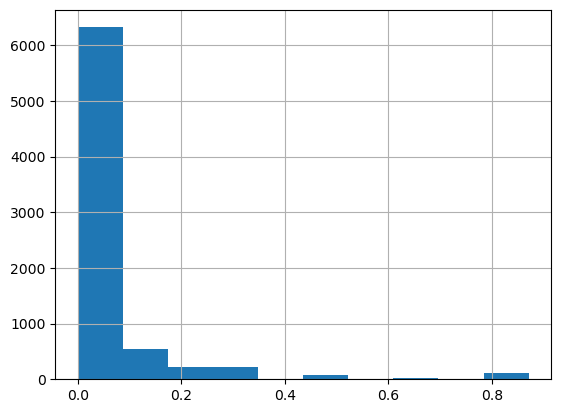

In [13]:
#plot histogram to check
labor_df['row_missing_percent'].hist()

In [14]:
# drop rows with %missing more than 10% missing data
cutpoint = .5
#drop rows w
labor_df=labor_df.loc[labor_df['row_missing_percent']<cutpoint]
labor_df

,RandomID,Q85,Q86,Q87,Q88,Q89,Q2,Q3,Q4,Q6,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,row_missing_percent
0,114016000000,4.0,4.0,4.0,4.0,4.0,3.0,5.0,5.0,4.0,...,B,B,B,B,B,B,A,B,A,0.0
1,137377000000,5.0,5.0,5.0,5.0,5.0,2.0,5.0,4.0,2.0,...,B,B,B,B,A,B,B,B,A,0.0
2,131212000000,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,B,B,A,B,A,A,A,A,A,0.0
3,193260000000,2.0,2.0,1.0,2.0,5.0,1.0,2.0,4.0,2.0,...,B,B,B,A,A,A,B,A,C,0.0
4,197278000000,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,...,B,A,B,A,A,A,A,B,C,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,105014000000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,A,B,B,A,A,A,A,B,A,0.0
7546,189629000000,2.0,3.0,1.0,4.0,5.0,4.0,3.0,4.0,2.0,...,C,B,B,A,A,A,B,B,D,0.0
7547,125973000000,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,C,B,B,A,A,A,B,B,A,0.0
7548,164714000000,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,...,B,B,B,A,A,A,B,B,A,0.0


In [16]:
labor_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7371 entries, 0 to 7549
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RandomID             7371 non-null   int64  
 1   Q85                  7284 non-null   float64
 2   Q86                  7250 non-null   float64
 3   Q87                  7282 non-null   float64
 4   Q88                  7261 non-null   float64
 5   Q89                  7289 non-null   float64
 6   Q2                   7268 non-null   float64
 7   Q3                   7262 non-null   float64
 8   Q4                   7281 non-null   float64
 9   Q6                   7235 non-null   float64
 10  Q7                   7299 non-null   float64
 11  Q84                  7268 non-null   object 
 12  Q55                  7343 non-null   object 
 13  Q56                  7311 non-null   object 
 14  Q57                  7308 non-null   object 
 15  Q59                  7354 non-null   o

In [17]:
labor_df.value_counts()


RandomID      Q85  Q86  Q87  Q88  Q89  Q2   Q3   Q4   Q6   Q7   Q84  Q55  Q56  Q57  Q59  Q60  Q46  Q48  Q49  Q50  Q52  DRNO  DHISP  DDIS  DAGEGRP  DSUPER  DFEDTEN  DSEX  DMIL  DLEAVING  row_missing_percent
100039000000  4.0  5.0  5.0  5.0  5.0  4.0  5.0  4.0  2.0  4.0  4    4    5    4    5    5    4    4.0  4.0  5.0  5.0  A     B      B     B        A       C        A     A     B         0.0                    1
168017000000  5.0  5.0  5.0  5.0  5.0  3.0  4.0  4.0  3.0  4.0  4    3    4    4    4    3    4    5.0  5.0  5.0  4.0  B     B      B     B        A       B        B     B     A         0.0                    1
168073000000  5.0  5.0  5.0  5.0  5.0  5.0  4.0  5.0  4.0  5.0  5    5    5    5    5    5    5    5.0  5.0  5.0  5.0  A     B      B     B        A       C        A     A     A         0.0                    1
168069000000  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5    5    5    5    5    5    5    5.0  5.0  5.0  5.0  C     B      B     B        B       C     

<Axes: >

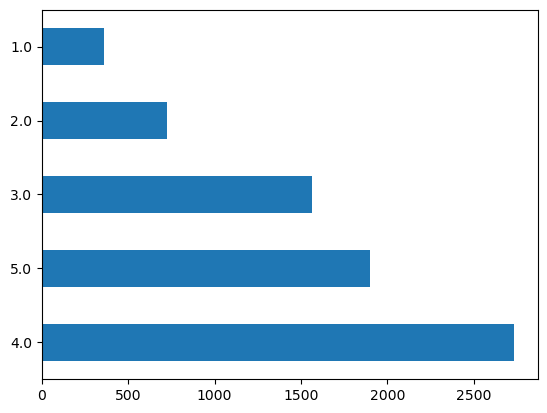

In [18]:
labor_df['Q85'].value_counts().plot(kind='barh')

RECODE MISSING VALUES

In [19]:
# convert X to missing
labor_df = df.replace(r'X', np.nan, regex=True)

In [21]:
# put the columns in a list
df_columns = labor_df.columns.tolist()
df_columns

['RandomID',
 'agency',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Q10',
 'Q11',
 'Q12',
 'Q13',
 'Q14',
 'Q15_1',
 'Q15_2',
 'Q15_3',
 'Q15_4',
 'Q15_5',
 'Q15_6',
 'Q16',
 'Q17',
 'Q18',
 'Q19',
 'Q20',
 'Q21',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q26',
 'Q27',
 'Q28',
 'Q29',
 'Q30',
 'Q31',
 'Q32',
 'Q33',
 'Q34',
 'Q35',
 'Q36',
 'Q37',
 'Q38',
 'Q39',
 'Q40',
 'Q41',
 'Q42',
 'Q43',
 'Q44',
 'Q45',
 'Q46',
 'Q47',
 'Q48',
 'Q49',
 'Q50',
 'Q51',
 'Q52',
 'Q53',
 'Q54',
 'Q55',
 'Q56',
 'Q57',
 'Q58',
 'Q59',
 'Q60',
 'Q61',
 'Q62',
 'Q63',
 'Q64',
 'Q65',
 'Q66',
 'Q67',
 'Q68',
 'Q69',
 'Q70',
 'Q71',
 'Q72',
 'Q73',
 'Q74',
 'Q75',
 'Q76',
 'Q77',
 'Q78',
 'Q79',
 'Q80',
 'Q81',
 'Q82',
 'Q83',
 'Q84',
 'Q85',
 'Q86',
 'Q87',
 'Q88',
 'Q89',
 'Q90',
 'Q91',
 'Q92',
 'Q93',
 'Q94',
 'Q95',
 'Q96',
 'Q97',
 'Q98',
 'Q99',
 'DRNO',
 'DHISP',
 'DDIS',
 'DAGEGRP',
 'DSUPER',
 'DFEDTEN',
 'DSEX',
 'DMIL',
 'DLEAVING',
 'POSTWT']

In [22]:
#impute with mode (doesn't mess with distribution)

for impute_column in df_columns:
    labor_df[impute_column].fillna(labor_df[impute_column].mode()[0], inplace=True)

In [23]:
#change type for numeric vars
numeric_vars = []
for num_columns in numeric_vars:
    labor_df[num_columns]=labor_df[num_columns].astype(int)

Create Dummies

In [ ]:
#get dummies for variables in Demographic Codes (DO NOT DO THIS FOR OUTCOME & Q84)
pd.get_dummies(labor_df, columns=['

In [ ]:
#add dummies back into dataframe

In [ ]:
#recode variable for Q84- 
#turn variable into a binary variable (do you have any unmet needs or is this org failing to meet your needs)
#Reducing
labor_df['q84'] = np.where(labor_df['q84'].isin(['1', '2']),1,0]

In [ ]:
#recode outcome variable to where stay is 0 and everything else is 1
test_df['DLeaving'] = np.where(test_df['DLeaving']=='A'),0,1]

In [ ]:
# you can create a list of variables and convert them in a loop
# need to make sure that you only use variables in the loop with the same responses
# and create a new dictionary and loop for other resposne patterns
# for variables with the following response format:
# 5	Strongly Agree
# 4	Agree
# 3	Neither Agree nor Disagree
# 2	Disagree
# 1	Strongly Disagree
# X	Do Not Know
# dict_DNK = {'5':'5', '4':'4','3':'3', '2':'2', '1':'1','X':'3'}
# # these are example variables
# variables_to_convert = ['Q_1', 'Q_2', 'Q_3']
# for variable in variables_to_convert:
#     # replace missing value with most common value
#     df[variable] = df[variable].fillna(df[variable].mode()[0])
#     # convert X to middle value of scale
#     df[variable] = df.replace({variable: dict_DNK},inplace=True)
#     # convert variable to numeric
#     df[variable]=df[variable].astype(int)

Correlation Matrix

/var/folders/ls/s8_f754d14xcgst65tms9yz00000gn/T/ipykernel_3227/1851823875.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = labor_df.corr()


<Axes: >

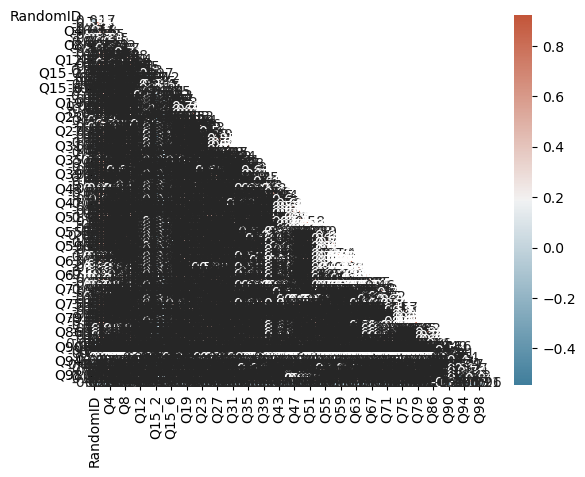

In [27]:

#
# Correlation between different variables
#
corr = labor_df.corr()
#
# Set up the matplotlib plot configuration
#
#f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
#mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [ ]:
#if you find a dataset that is strongly correlated you can collapse into a set
#example
#test_df['new_var']=(test_df['Q55']+test_df['Q56']+test_df['Q57'])/3

Logistic Regresssion


In [ ]:
#who does this predict poorly for
#how does it predict differently for 
#different sub-populations

#identify those it identifies correctly or incorrectly to 
#check for bias

#Key course parts for executing any project: Day 1 Supervised Learning: Activities 3 & 5; Day 2 Supervised Learning Activity 5; Day 2 Unsupervised Learning Activity 4